# Unsupervised Machine Learning Visualization Techniques on Microbiome Data
By Mundy Reimer and Nicholas Parker

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data
See Data Acquisition Notebook for instructions on how to get microbial data

File used for this analysis is 60899 from [Geographic Location Study](https://www.ebi.ac.uk/ena/data/view/PRJEB13115)
Samples taken from office dust

In [2]:
%%capture
sample_table = pd.read_csv('data/mapping_files/60899_mapping_file.txt', sep = '\t')
feature_table_raw = pd.read_csv('data/BIOM/60899/feature_table.tsv', sep = '\t', )

In [3]:
def convert_tsv(df):
    """
    Helper function to take the output of the biom-format package from a .biom file
    Converts it to a feature table
    """
    length = df.shape[0]
    df = df.reset_index().T
    df.set_index(0)
    
    # We remove the DNA sequence for an encoding, less space
    new_header = ['Sample_id'] + list(range(length -1))
    
    df = df[1:]
    df.columns = new_header
    df = df.reset_index().drop('index',axis = 1)
    return df

In [4]:
feature_table = convert_tsv(feature_table_raw)
feature_table = feature_table.set_index('Sample_id').astype(float).astype(int)

In [5]:
# Subsetting the feature table
print(feature_table.shape)

# Make sure the sequence has more than 20,000 reads total
feature_table = feature_table.loc[(feature_table.sum(axis='columns') > 20000)]

# Make sure the sequence has been seen in at least 3 different samples
feature_table = feature_table[feature_table.columns[((feature_table > 0).sum() > 3)]]

(1497, 25756)


In [6]:
print(feature_table.shape)

(301, 1894)


In [7]:
# subset sample table
sample_table = sample_table.set_index('#SampleID')
sample_table = sample_table.loc[feature_table.index]

In [8]:
sample_table['city'].drop_duplicates()

Sample_id
10423.2W7XBRCALFB6G    flagstaff
10423.XQUEYVMRE7WO      sandiego
10423.3M3DNBS131EB9      toronto
Name: city, dtype: object

# PCA

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.array(feature_table))
plot_df = pd.DataFrame(data = principalComponents, columns = ['dim1', 'dim2'], index = feature_table.index)

In [43]:
plot_df['dim1'] = plot_df['dim1']/1000
plot_df['dim2'] = plot_df['dim2']/1000

In [44]:
plot_df.head()

,dim1,dim2
Sample_id,,
10423.2W7XBRCALFB6G,-2.163090,0.602824
10423.XQUEYVMRE7WO,-1.740795,-0.960952
10423.5JDO0IF63U95O,-2.215755,-1.015710
10423.4GREFKC5QDM7A,-2.155372,-1.356427
10423.3M3DNBS131EB9,-1.844913,-1.288187


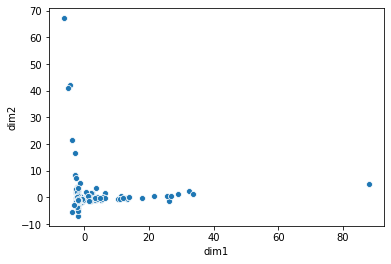

In [45]:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

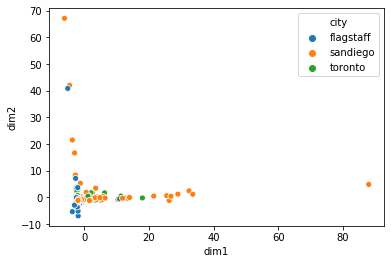

In [47]:
plot_df = pd.concat([plot_df, sample_table['city']], axis = 1)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'city', data = plot_df)

# tSNE

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(metric = 'jaccard')
embeddings = tsne.fit_transform(feature_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = feature_table.index)

In [21]:
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='jaccard', min_grad_norm=1e-07, n_components=2,
     n_iter=1000, n_iter_without_progress=300, n_jobs=None, perplexity=30.0,
     random_state=None, verbose=0)

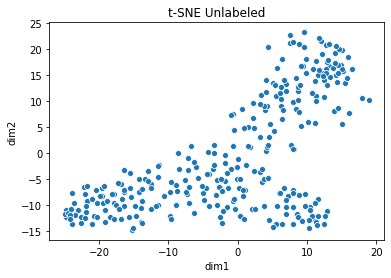

In [22]:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

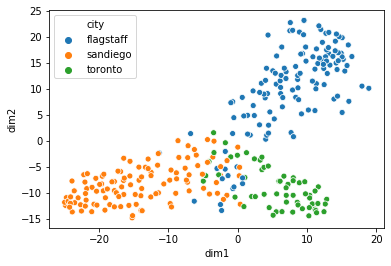

In [23]:
plot_df = pd.concat([plot_df, sample_table['city']], axis = 1)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'city', data = plot_df)

# UMAP

In [25]:
import umap
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'jaccard', random_state = 0)
embeddings = reducer.fit_transform(feature_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = feature_table.index)

/Users/nicholasparker/Documents/Github_Repos/nickparker-notebooks/cotton_project/cotton_clustering_venv/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1735: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


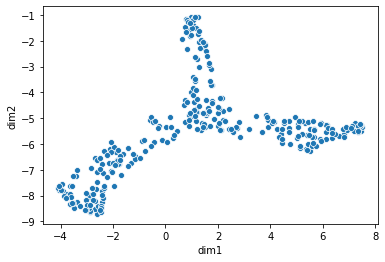

In [26]:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

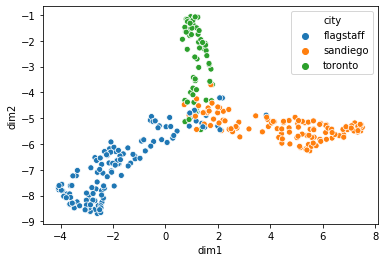

In [28]:
plot_df = pd.concat([plot_df, sample_table['city']], axis = 1)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'city', data = plot_df)